In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

In [3]:
# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),GDP Growth Rate (%)
0,4,Afghanistan,1970,7.538182,0.554884,64.438326,3.760982,51.969129,3.347074,576.468421,1.273376,9.755310,5.743448,7.605653,7.420787,3.630362,6.431451,7.470182,7.419960,0.000000
1,4,Afghanistan,1971,7.722549,0.571958,67.468748,3.938419,52.760867,3.615368,576.525990,1.332602,10.537273,8.126367,7.962998,7.770155,3.788722,6.733500,7.824396,7.769324,4.708443
2,4,Afghanistan,1972,7.912533,0.490859,61.329284,3.578831,53.725682,3.234255,576.584133,1.392420,9.426490,8.540304,7.238874,7.062262,3.467604,6.121514,7.120268,7.061439,-9.111290
3,4,Afghanistan,1973,8.114899,0.495128,63.369402,3.698453,53.704705,3.254133,576.823167,1.638337,9.484426,7.734202,7.479646,7.297527,3.574606,6.324554,7.357769,7.296701,3.331649
4,4,Afghanistan,1974,8.321489,0.610373,76.734323,4.480963,55.347693,3.838476,577.520886,2.356149,11.187542,8.990563,9.055624,8.838372,4.272987,7.656986,8.910406,8.837529,21.116783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,Zambia,2017,12.128359,6.035436,77.111493,198.028986,303.589172,105.949673,713.990423,135.114720,76.434504,278.408674,43.174885,103.709040,79.176713,151.238345,106.154568,111.011070,20.585248
10508,894,Zambia,2018,12.505555,6.048241,65.119706,202.962211,330.073620,99.817867,708.240559,124.336092,74.415103,285.802016,37.002704,103.962643,100.288860,170.190922,109.665214,112.915891,1.715884
10509,894,Zambia,2019,12.887480,5.173231,49.395444,206.475772,275.885335,123.049221,694.957062,112.176906,61.937809,234.159254,32.499643,92.434751,102.173432,140.888565,97.061653,100.033389,-11.408936
10510,894,Zambia,2020,13.271268,3.815898,39.938470,214.613187,287.222747,79.533514,651.741902,72.802135,43.831868,173.304501,28.697149,73.724440,90.971421,91.878482,74.401574,77.716976,-22.308964


In [4]:
data.describe()

,CountryID,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),GDP Growth Rate (%)
count,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,10512.000000,1.051200e+04
mean,431.116629,1996.262747,19.995150,38.122973,570.630162,808.212372,1367.290924,916.452563,1181.031139,605.190625,660.265700,1345.046706,632.435281,748.828924,622.548090,709.622170,773.400379,784.866642,inf
std,251.169090,14.900361,80.041006,72.861479,2971.793879,4020.642771,4947.329238,4681.613033,3488.232860,3517.542688,3788.649903,5296.985107,3532.839706,4182.850632,3681.328757,3944.843311,4212.773680,4225.750059,NaN
min,4.000000,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.647401e+01
25%,212.000000,1984.000000,0.440920,2.970766,8.643772,5.483671,58.596470,6.204950,578.808924,3.584478,5.756326,16.946998,2.210443,5.807980,3.776257,5.783375,5.962741,6.165802,2.176741e-02
50%,430.000000,1997.000000,3.539684,9.742491,67.148563,29.968746,115.236978,32.846875,597.803145,21.468073,31.749203,83.901112,18.534841,32.152620,21.840405,29.684669,33.405380,34.626555,7.132177e+00
75%,643.000000,2009.000000,11.771083,38.123765,293.960746,227.062348,480.522918,218.966177,736.160247,155.260378,187.690386,468.767358,150.795310,206.819898,158.025616,188.526700,212.094628,221.988766,1.489674e+01
max,894.000000,2021.000000,1000.000000,1000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,inf


In [5]:
# Check for missing values
print(data.isnull().sum())

CountryID                                                                                   0
Country                                                                                     0
Year                                                                                        0
Population                                                                                  0
Per capita GNI                                                                              0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          0
Construction (ISIC F)                                                                       0
Exports of goods and services                                                               0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less d

In [6]:
data.dtypes

CountryID                                                                                     int64
Country                                                                                      object
Year                                                                                          int64
Population                                                                                  float64
Per capita GNI                                                                              float64
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          float64
Construction (ISIC F)                                                                       float64
Exports of goods and services                                                               float64
General government final consumption expenditure                                            float64
Gross capital formation                                                                     float64


In [7]:
# Change categorical variables to "category"
data['Country'] = data['Country'].astype('category')

In [8]:
data.dtypes

CountryID                                                                                      int64
Country                                                                                     category
Year                                                                                           int64
Population                                                                                   float64
Per capita GNI                                                                               float64
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           float64
Construction (ISIC F)                                                                        float64
Exports of goods and services                                                                float64
General government final consumption expenditure                                             float64
Gross capital formation                                                                    

In [9]:
# Create dummy variables
data = pd.get_dummies(data, columns=['Country'], drop_first=True)
data

,CountryID,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),...,Country_ Vanuatu,Country_ Venezuela (Bolivarian Republic of),Country_ Viet Nam,Country_ Yemen,Country_ Yemen Arab Republic (Former),Country_ Yemen Democratic (Former),Country_ Yugoslavia (Former),Country_ Zambia,Country_ Zanzibar,Country_ Zimbabwe
0,4,1970,7.538182,0.554884,64.438326,3.760982,51.969129,3.347074,576.468421,1.273376,...,False,False,False,False,False,False,False,False,False,False
1,4,1971,7.722549,0.571958,67.468748,3.938419,52.760867,3.615368,576.525990,1.332602,...,False,False,False,False,False,False,False,False,False,False
2,4,1972,7.912533,0.490859,61.329284,3.578831,53.725682,3.234255,576.584133,1.392420,...,False,False,False,False,False,False,False,False,False,False
3,4,1973,8.114899,0.495128,63.369402,3.698453,53.704705,3.254133,576.823167,1.638337,...,False,False,False,False,False,False,False,False,False,False
4,4,1974,8.321489,0.610373,76.734323,4.480963,55.347693,3.838476,577.520886,2.356149,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,2017,12.128359,6.035436,77.111493,198.028986,303.589172,105.949673,713.990423,135.114720,...,False,False,False,False,False,False,False,True,False,False
10508,894,2018,12.505555,6.048241,65.119706,202.962211,330.073620,99.817867,708.240559,124.336092,...,False,False,False,False,False,False,False,True,False,False
10509,894,2019,12.887480,5.173231,49.395444,206.475772,275.885335,123.049221,694.957062,112.176906,...,False,False,False,False,False,False,False,True,False,False
10510,894,2020,13.271268,3.815898,39.938470,214.613187,287.222747,79.533514,651.741902,72.802135,...,False,False,False,False,False,False,False,True,False,False


In [10]:
data = data[np.isfinite(data).all(axis=1)]
data

,CountryID,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),...,Country_ Vanuatu,Country_ Venezuela (Bolivarian Republic of),Country_ Viet Nam,Country_ Yemen,Country_ Yemen Arab Republic (Former),Country_ Yemen Democratic (Former),Country_ Yugoslavia (Former),Country_ Zambia,Country_ Zanzibar,Country_ Zimbabwe
0,4,1970,7.538182,0.554884,64.438326,3.760982,51.969129,3.347074,576.468421,1.273376,...,False,False,False,False,False,False,False,False,False,False
1,4,1971,7.722549,0.571958,67.468748,3.938419,52.760867,3.615368,576.525990,1.332602,...,False,False,False,False,False,False,False,False,False,False
2,4,1972,7.912533,0.490859,61.329284,3.578831,53.725682,3.234255,576.584133,1.392420,...,False,False,False,False,False,False,False,False,False,False
3,4,1973,8.114899,0.495128,63.369402,3.698453,53.704705,3.254133,576.823167,1.638337,...,False,False,False,False,False,False,False,False,False,False
4,4,1974,8.321489,0.610373,76.734323,4.480963,55.347693,3.838476,577.520886,2.356149,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,894,2017,12.128359,6.035436,77.111493,198.028986,303.589172,105.949673,713.990423,135.114720,...,False,False,False,False,False,False,False,True,False,False
10508,894,2018,12.505555,6.048241,65.119706,202.962211,330.073620,99.817867,708.240559,124.336092,...,False,False,False,False,False,False,False,True,False,False
10509,894,2019,12.887480,5.173231,49.395444,206.475772,275.885335,123.049221,694.957062,112.176906,...,False,False,False,False,False,False,False,True,False,False
10510,894,2020,13.271268,3.815898,39.938470,214.613187,287.222747,79.533514,651.741902,72.802135,...,False,False,False,False,False,False,False,True,False,False


In [11]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

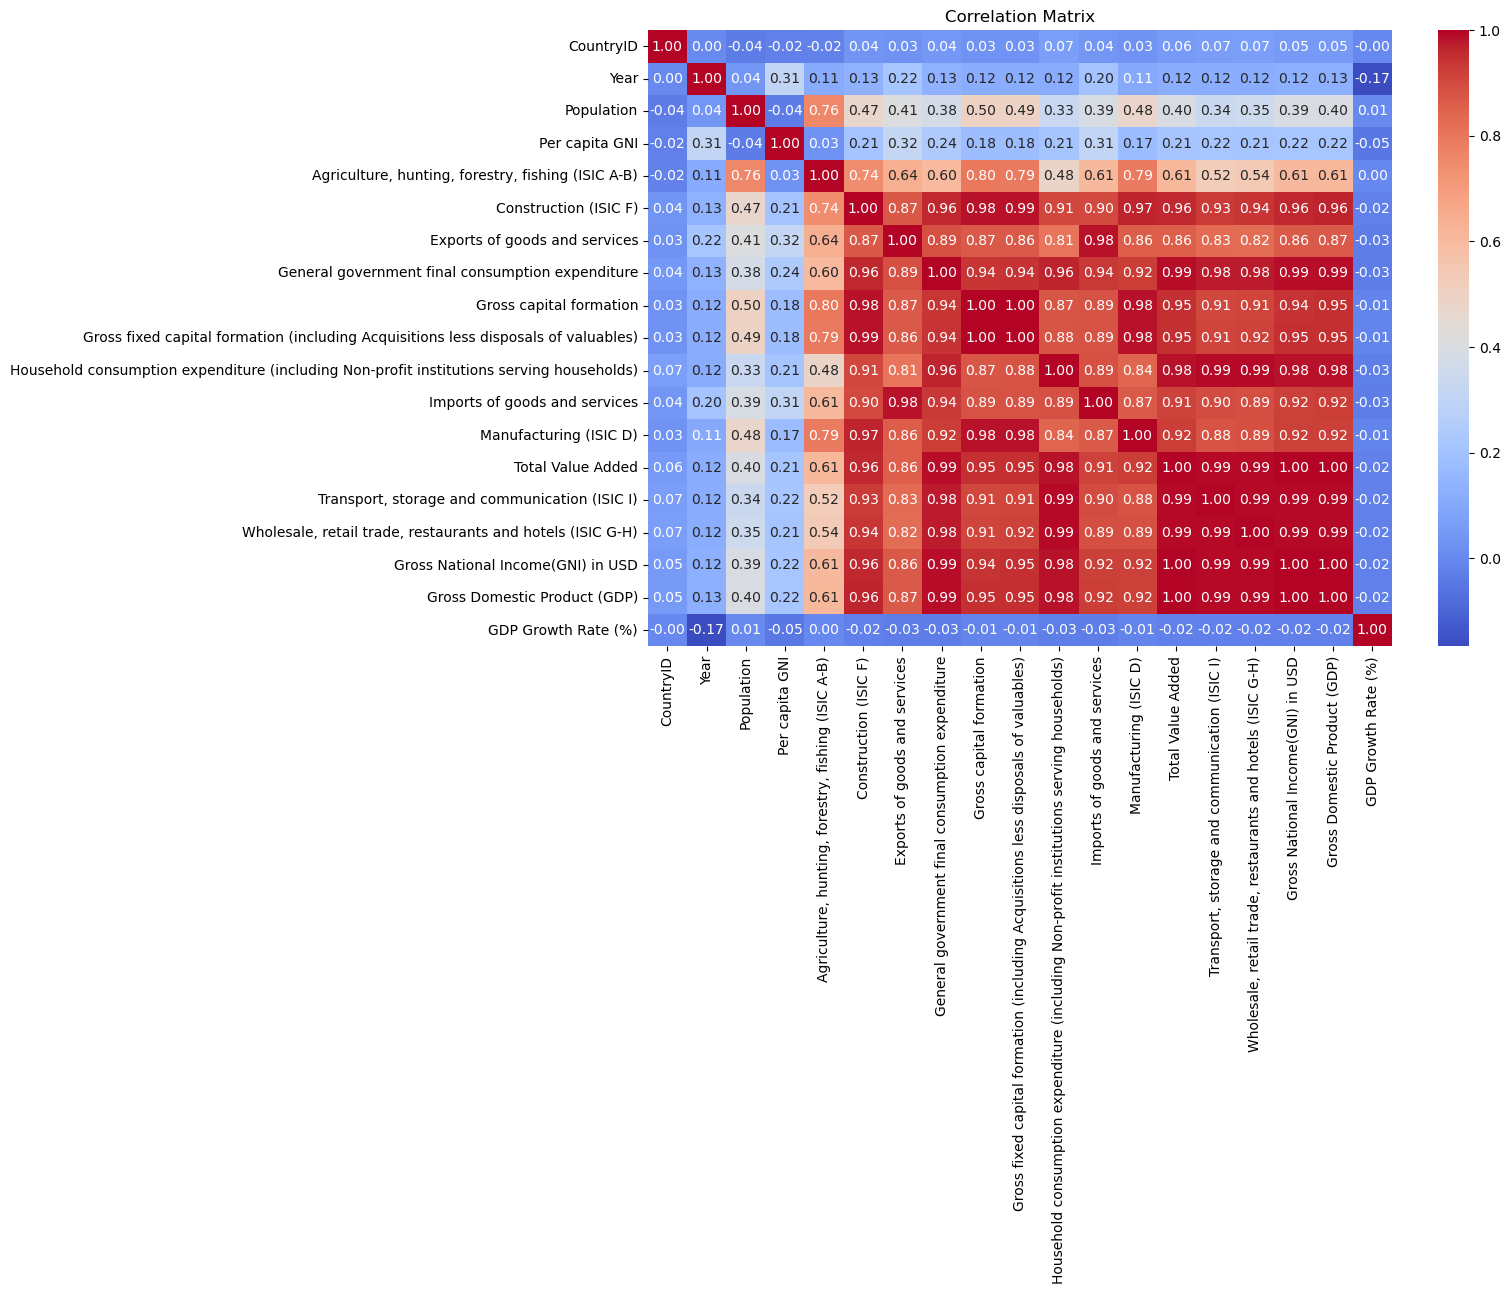

Gross Domestic Product (GDP)                                                              Gross National Income(GNI) in USD                                                           0.999887
Gross National Income(GNI) in USD                                                         Gross Domestic Product (GDP)                                                                0.999887
Gross capital formation                                                                   Gross fixed capital formation (including Acquisitions less disposals of valuables)          0.999722
Gross fixed capital formation (including Acquisitions less disposals of valuables)        Gross capital formation                                                                     0.999722
Gross Domestic Product (GDP)                                                              Total Value Added                                                                           0.999477
                                             

In [12]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
numeric_data = data[numeric_cols]

# Calculate the correlation matrix for the numeric data
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Displaying correlation pairs that are highly correlated (above 0.90)
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs >= 0.9]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # remove self-correlation
print(high_corr_pairs)

Simple Linear Regression

In [13]:
# Define the features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Splitting the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Display the sizes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7357, 237), (3154, 237), (7357,), (3154,))

In [14]:
import statsmodels.api as sm
# Prepare the data
X = data['Gross National Income(GNI) in USD']  # Predictor
y = data['GDP Growth Rate (%)']  # Target variable
X = sm.add_constant(X)  # Adding a constant for the intercept

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


                             OLS Regression Results                            
Dep. Variable:     GDP Growth Rate (%)   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     5.588
Date:                 Thu, 16 May 2024   Prob (F-statistic):             0.0181
Time:                         14:53:54   Log-Likelihood:                -43136.
No. Observations:                10511   AIC:                         8.628e+04
Df Residuals:                    10509   BIC:                         8.629e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

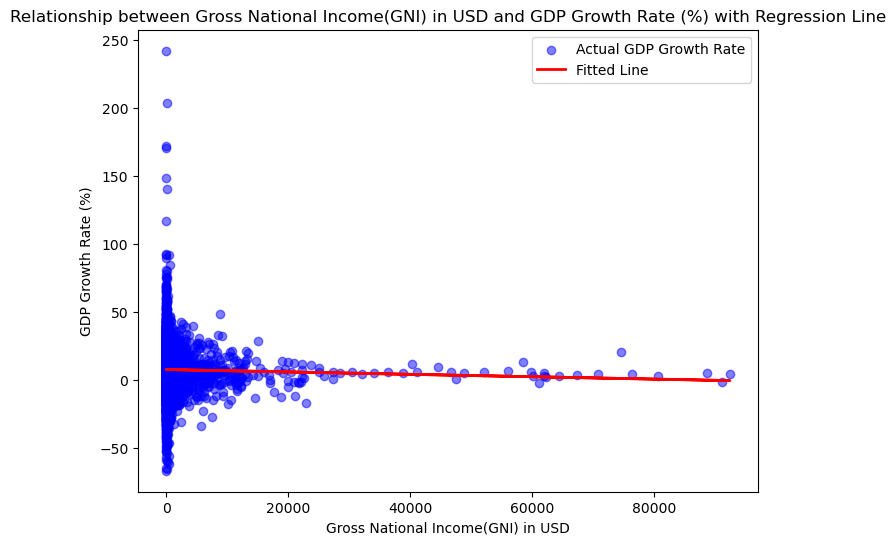

0.0006362855509906007

In [15]:
from sklearn.linear_model import LinearRegression

X_train_GDP = X_train[['Gross National Income(GNI) in USD']]
X_test_GDP = X_test[['Gross National Income(GNI) in USD']]

# Creating and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_GDP, y_train)

# Predicting the quality on the training set
y_train_pred = linear_model.predict(X_train_GDP)

# Computing the R-squared value on the training set
r_squared_train = linear_model.score(X_train_GDP, y_train)


plt.figure(figsize=(8, 6))
plt.scatter(X_train_GDP, y_train, color='blue', label='Actual GDP Growth Rate', alpha=0.5)
plt.plot(X_train_GDP, y_train_pred, color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Gross National Income(GNI) in USD')
plt.ylabel('GDP Growth Rate (%)')
plt.title('Relationship between Gross National Income(GNI) in USD and GDP Growth Rate (%) with Regression Line')
plt.legend()
plt.show()

r_squared_train


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test_pred = linear_model.predict(X_test_GDP)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("MAE:", mae, "RMSE:", rmse)

MAE: 9.876288514500375 RMSE: 14.210700807485937


Multiple Linear Regression

In [17]:
features = ['Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Construction (ISIC F)', 'Exports of goods and services', 'Imports of goods and services','Manufacturing (ISIC D)','Transport, storage and communication (ISIC I)','Wholesale, retail trade, restaurants and hotels (ISIC G-H)']  # Multiple predictors
X = data[features]  # Predictor matrix
y = data['GDP Growth Rate (%)']  # Target variable
X = sm.add_constant(X)  # Adding a constant for the intercept

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                             OLS Regression Results                            
Dep. Variable:     GDP Growth Rate (%)   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     4.173
Date:                 Thu, 16 May 2024   Prob (F-statistic):           0.000134
Time:                         14:53:55   Log-Likelihood:                -43124.
No. Observations:                10511   AIC:                         8.626e+04
Df Residuals:                    10503   BIC:                         8.632e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [18]:
# Selecting multiple features for the predictors
features = ['Agriculture, hunting, forestry, fishing (ISIC A-B)', 'Construction (ISIC F)', 'Exports of goods and services', 'Imports of goods and services','Manufacturing (ISIC D)','Transport, storage and communication (ISIC I)','Wholesale, retail trade, restaurants and hotels (ISIC G-H)']  # Multiple predictors
X_train_multi = X_train[features]
X_test_multi = X_test[features]

# Creating and training the multiple linear regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train)

# Predicting the quality on the training set
y_train_pred_multi = multi_linear_model.predict(X_train_multi)

# Computing the R-squared value on the training set
r_squared_train_multi = multi_linear_model.score(X_train_multi, y_train)

# Getting the coefficients of the model
coefficients = pd.DataFrame(multi_linear_model.coef_, index=features, columns=['Coefficient'])

# Displaying the coefficients and the R-squared value
coefficients, r_squared_train_multi

(                                                    Coefficient
 Agriculture, hunting, forestry, fishing (ISIC A-B)     0.000149
 Construction (ISIC F)                                 -0.000089
 Exports of goods and services                          0.000458
 Imports of goods and services                         -0.000732
 Manufacturing (ISIC D)                                -0.000014
 Transport, storage and communication (ISIC I)          0.000631
 Wholesale, retail trade, restaurants and hotels...    -0.000243,
 0.0024902910084863006)

In [19]:
y_test_pred_multi = multi_linear_model.predict(X_test_multi)

# Calculating MAE and RMSE for the test set predictions
mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_test_pred_multi))

print("MAE:", mae_multi, "RMSE:", rmse_multi)

MAE: 9.863848966690384 RMSE: 14.18965461625544


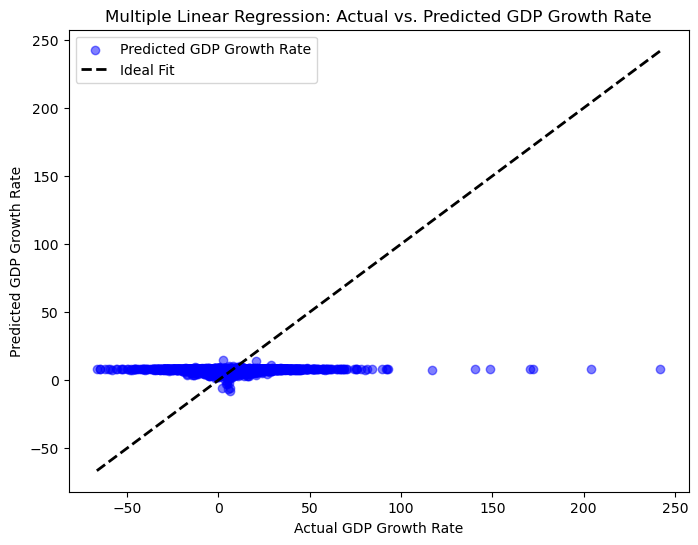

In [20]:
# Visualizing the relationship between Predicted Quality and Actual Quality
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_multi, color='blue', label='Predicted GDP Growth Rate', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Multiple Linear Regression: Actual vs. Predicted GDP Growth Rate')
plt.legend()
plt.show()

In [21]:
features = ['Imports of goods and services','Transport, storage and communication (ISIC I)']  # Multiple predictors
X = data[features]  # Predictor matrix
y = data['GDP Growth Rate (%)']  # Target variable
X = sm.add_constant(X)  # Adding a constant for the intercept

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)

                             OLS Regression Results                            
Dep. Variable:     GDP Growth Rate (%)   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     6.600
Date:                 Thu, 16 May 2024   Prob (F-statistic):            0.00137
Time:                         14:53:55   Log-Likelihood:                -43132.
No. Observations:                10511   AIC:                         8.627e+04
Df Residuals:                    10508   BIC:                         8.629e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [22]:
# Selecting multiple features for the predictors
features = ['Imports of goods and services','Transport, storage and communication (ISIC I)']  # Multiple predictors
X_train_multi = X_train[features]
X_test_multi = X_test[features]

# Creating and training the multiple linear regression model
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train_multi, y_train)

# Predicting the quality on the training set
y_train_pred_multi = multi_linear_model.predict(X_train_multi)

# Computing the R-squared value on the training set
r_squared_train_multi = multi_linear_model.score(X_train_multi, y_train)

# Getting the coefficients of the model
coefficients = pd.DataFrame(multi_linear_model.coef_, index=features, columns=['Coefficient'])

# Displaying the coefficients and the R-squared value
coefficients, r_squared_train_multi

(                                               Coefficient
 Imports of goods and services                    -0.000180
 Transport, storage and communication (ISIC I)     0.000128,
 0.001416442214658864)

In [23]:
y_test_pred_multi = multi_linear_model.predict(X_test_multi)

# Calculating MAE and RMSE for the test set predictions
mae_multi = mean_absolute_error(y_test, y_test_pred_multi)
rmse_multi = np.sqrt(mean_squared_error(y_test, y_test_pred_multi))

print("MAE:", mae_multi, "RMSE:", rmse_multi)

MAE: 9.876731862348816 RMSE: 14.206715209266372


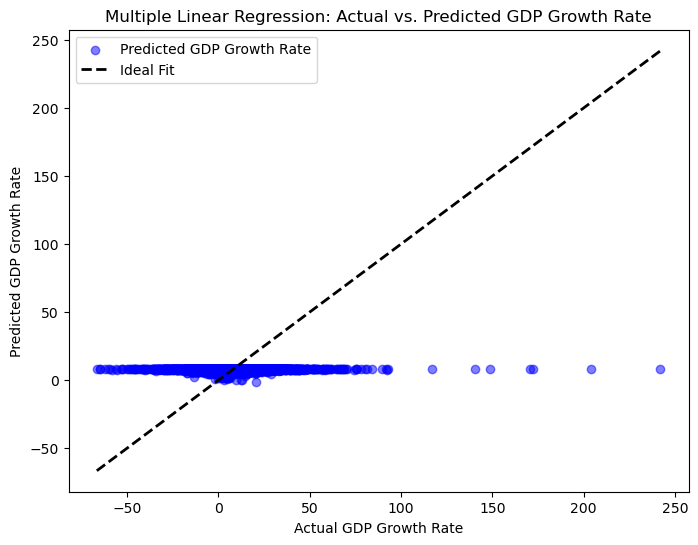

In [24]:
# Visualizing the relationship between Predicted Quality and Actual Quality
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_multi, color='blue', label='Predicted GDP Growth Rate', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Multiple Linear Regression: Actual vs. Predicted GDP Growth Rate')
plt.legend()
plt.show()

In [25]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Creating the regression tree model
tree_model = DecisionTreeRegressor(max_depth=13, random_state=1)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=13, random_state=1)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Making predictions on the test set
y_test_pred = tree_model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Output the evaluation metrics
mae, rmse

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(9.296467420521315, 15.165038050082352)

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MAE: 9.30, RMSE: 15.17


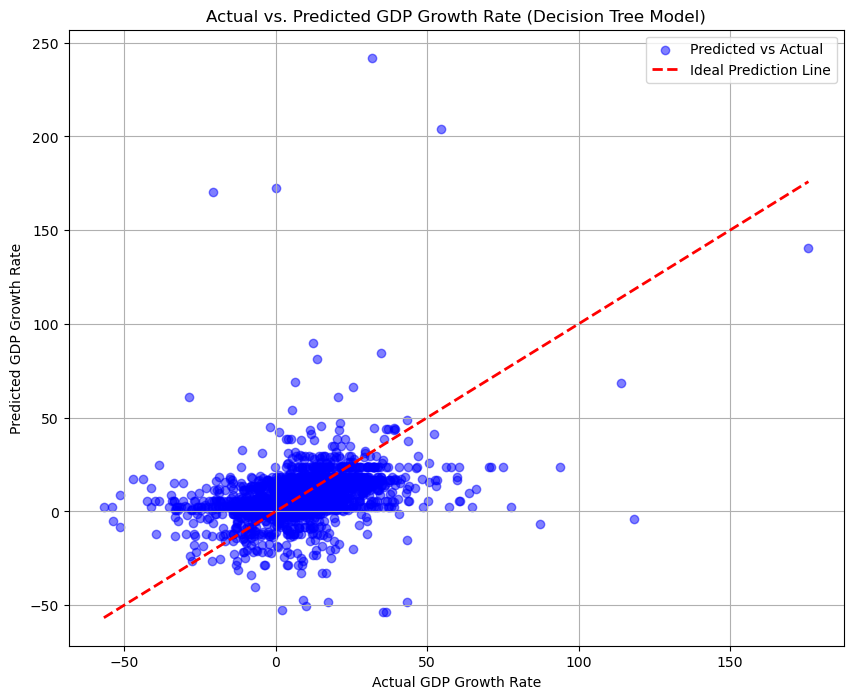

In [27]:


# Making predictions on the test set
y_test_pred = tree_model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Output the evaluation metrics
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualization: Actual vs. Predicted GDP Growth Rate
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Actual vs. Predicted GDP Growth Rate (Decision Tree Model)')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
# Experimenting with different depths
depths = [3, 4, 5, 6, 7, 9, 11, 13, 14]
results = []

for depth in depths:
    # Create and fit the tree model
    model = DecisionTreeRegressor(max_depth=depth, random_state=1)
    model.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = model.predict(X_test)

    # Calculating metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Storing results
    results.append((depth, mae, rmse))

# Display results as a DataFrame for easy comparison
results_df = pd.DataFrame(results, columns=['Max Depth', 'MAE', 'RMSE'])
results_df


C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 an

,Max Depth,MAE,RMSE
0,3,9.093790,13.965277
1,4,8.910964,13.898502
2,5,8.681504,13.635136
3,6,8.774451,14.196214
4,7,8.815041,14.615508
5,9,8.900320,14.798264
6,11,9.210352,15.095176
7,13,9.296467,15.165038
8,14,9.569810,15.686906


In [29]:
from sklearn.svm import SVR

# Creating and training the SVR model with default parameters
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred_svr = svr_model.predict(X_test)

# Calculating MAE and RMSE for the SVR model
mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
rmse_svr = mean_squared_error(y_test, y_test_pred_svr, squared=False)

mae_svr, rmse_svr


C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(9.836353695550823, 14.205737537481077)

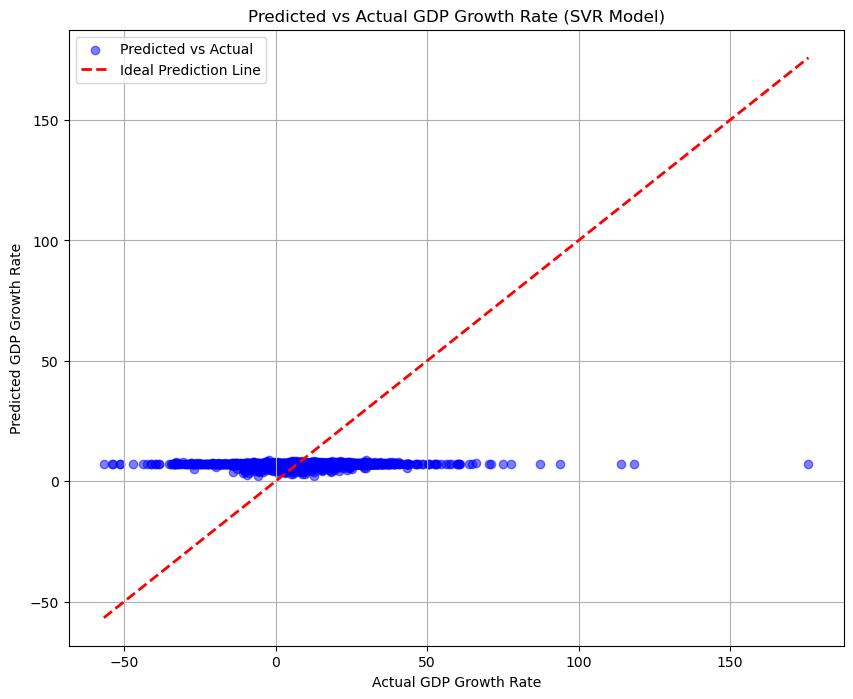

In [30]:
# Visualization: Plot of predicted vs actual GDP Growth Rate
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred_svr, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (SVR Model)')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
# Creating and training the MLP model with a basic architecture
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100, random_state=1)
mlp_model.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred_mlp = mlp_model.predict(X_test)

# Calculating MAE and RMSE for the MLP model
mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
rmse_mlp = mean_squared_error(y_test, y_test_pred_mlp, squared=False)

mae_mlp, rmse_mlp

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(16.697451900872906, 37.379334064149006)

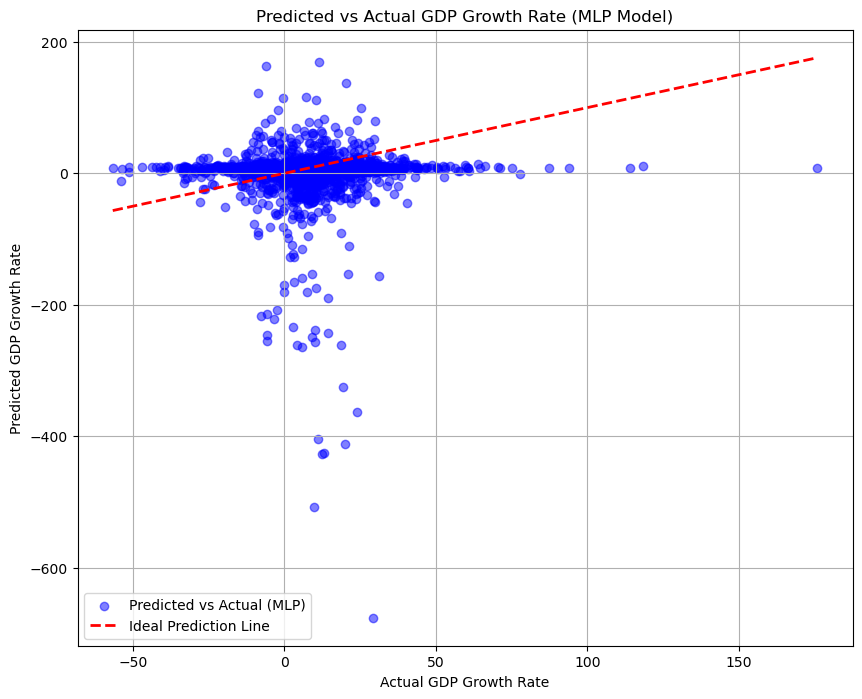

In [32]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred_mlp, alpha=0.5, color='blue', label='Predicted vs Actual (MLP)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (MLP Model)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Splitting the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest - MAE: 10.93, RMSE: 15.83


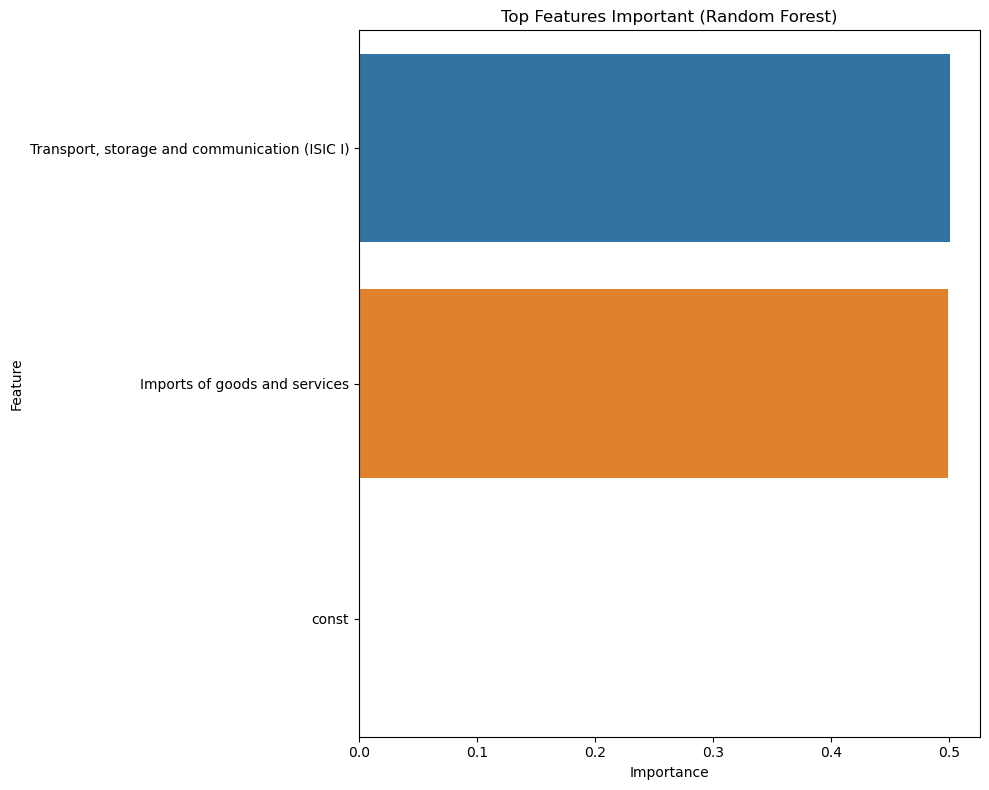

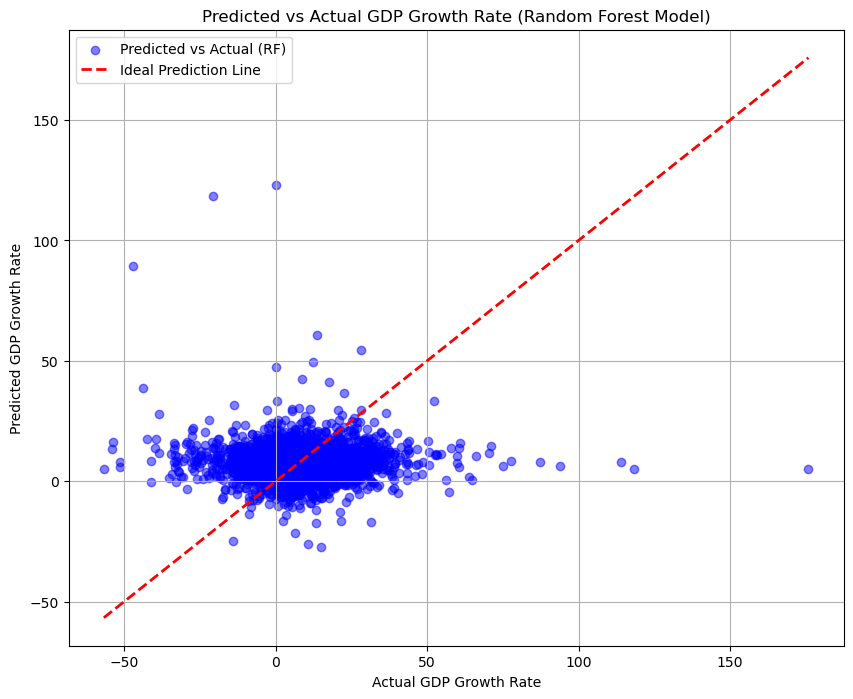

In [34]:
from sklearn.ensemble import RandomForestRegressor
# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_test_pred)
rmse_rf = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")

feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top Features Important (Random Forest)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicted vs Actual (RF)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (Random Forest Model)')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering - Polynomial Features (Degree 2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Combine original and polynomial features
X_combined = pd.concat([pd.DataFrame(X, columns=X.columns), X_poly_df], axis=1)

# Ensure all features are numerical and consistent
X_combined = X_combined.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X_combined.index]

# Reset index to ensure consistency
X_combined = X_combined.reset_index(drop=True)
y = y.reset_index(drop=True)


In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=1)

# Feature Selection with SelectFromModel
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
sfm = SelectFromModel(estimator=rf_model, threshold='mean')
sfm.fit(X_train, y_train)
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest with SelectFromModel - MAE: 11.50, RMSE: 15.68


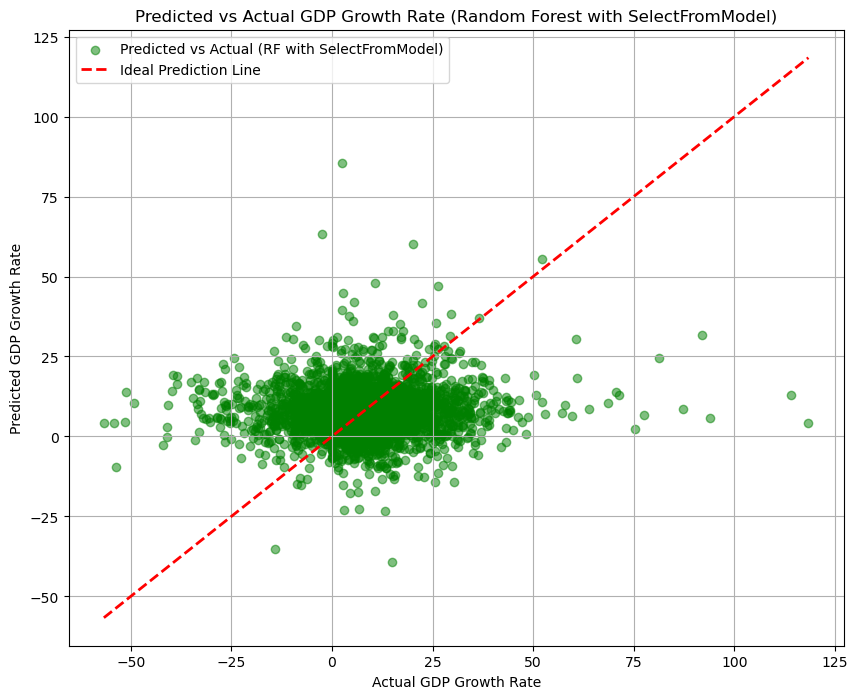

In [37]:
# Train a RandomForest model on the selected features
rf_model.fit(X_train_sfm, y_train)
y_test_pred_sfm = rf_model.predict(X_test_sfm)

# Calculate evaluation metrics
mae_rf_sfm = mean_absolute_error(y_test, y_test_pred_sfm)
rmse_rf_sfm = mean_squared_error(y_test, y_test_pred_sfm, squared=False)
print(f"Random Forest with SelectFromModel - MAE: {mae_rf_sfm:.2f}, RMSE: {rmse_rf_sfm:.2f}")

# Visualization: Plot of Predicted vs Actual GDP Growth Rate (SelectFromModel)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred_sfm, alpha=0.5, color='green', label='Predicted vs Actual (RF with SelectFromModel)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (Random Forest with SelectFromModel)')
plt.legend()
plt.grid(True)
plt.show()

Top 10 Features after SelectFromModel:
['Imports of goods and services Transport, storage and communication (ISIC I)', 'Imports of goods and services', 'Transport, storage and communication (ISIC I)', 'const Imports of goods and services', 'Transport, storage and communication (ISIC I)', 'Imports of goods and services', 'const Transport, storage and communication (ISIC I)', 'const', 'const']


C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest with Top 10 Features - MAE: 11.47, RMSE: 15.65


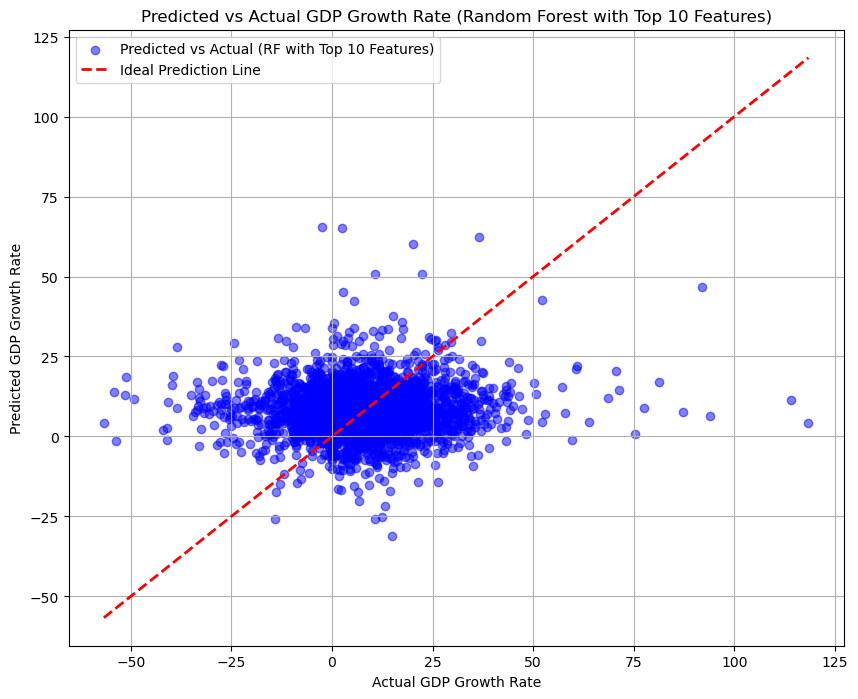

In [38]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = poly.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Combine original and polynomial features
X_combined = pd.concat([pd.DataFrame(X, columns=X.columns), X_poly_df], axis=1)

# Ensure all features are numerical and consistent
X_combined = X_combined.apply(pd.to_numeric, errors='coerce').dropna()
X_combined = X_combined.reset_index(drop=True)
y = y[X_combined.index].reset_index(drop=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=1)

# Feature Selection with RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Get feature importances and sort them in descending order
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select only the top 10 features
top_n = 10
top_indices = sorted_indices[:top_n]
top_feature_names = X_combined.columns[top_indices].tolist()
print("Top 10 Features after SelectFromModel:")
print(top_feature_names)

# Train a RandomForest model using only the top 10 features
X_train_top = X_train.iloc[:, top_indices]
X_test_top = X_test.iloc[:, top_indices]
rf_model.fit(X_train_top, y_train)
y_test_pred_top = rf_model.predict(X_test_top)

# Calculate evaluation metrics
mae_rf_top = mean_absolute_error(y_test, y_test_pred_top)
rmse_rf_top = mean_squared_error(y_test, y_test_pred_top, squared=False)
print(f"Random Forest with Top 10 Features - MAE: {mae_rf_top:.2f}, RMSE: {rmse_rf_top:.2f}")

# Visualization: Plot of Predicted vs Actual GDP Growth Rate (Top 10 Features)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred_top, alpha=0.5, color='blue', label='Predicted vs Actual (RF with Top 10 Features)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (Random Forest with Top 10 Features)')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest with PCA - MAE: 11.18, RMSE: 15.48


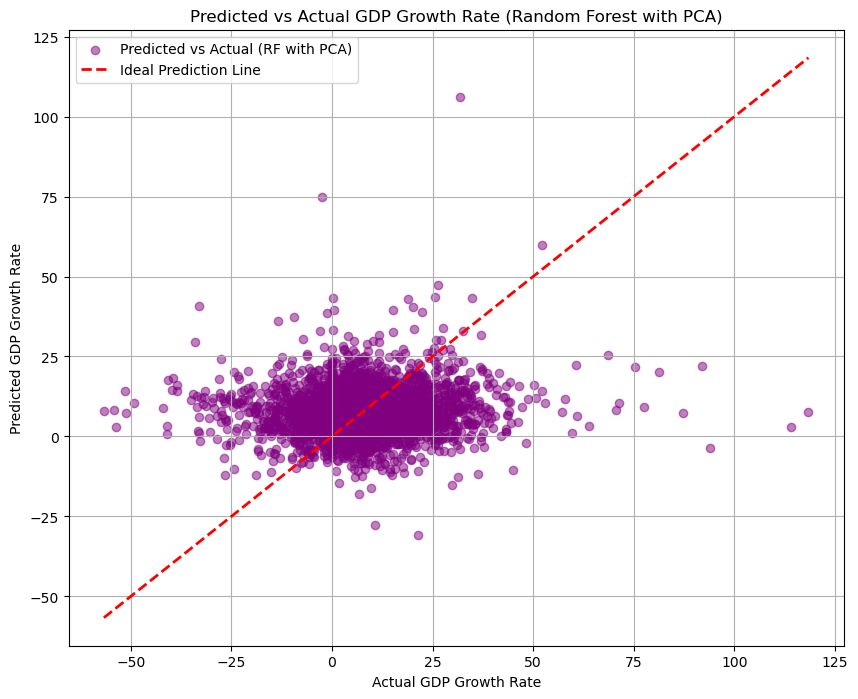

In [39]:
from sklearn.decomposition import PCA
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=1)

# Feature Selection with PCA
pca = PCA(n_components=9)  # Adjust the number of components accordingly
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a RandomForest model on the PCA features
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_model.fit(X_train_pca, y_train)
y_test_pred_pca = rf_model.predict(X_test_pca)

# Calculate evaluation metrics
mae_rf_pca = mean_absolute_error(y_test, y_test_pred_pca)
rmse_rf_pca = mean_squared_error(y_test, y_test_pred_pca, squared=False)
print(f"Random Forest with PCA - MAE: {mae_rf_pca:.2f}, RMSE: {rmse_rf_pca:.2f}")

# Visualization: Plot of Predicted vs Actual GDP Growth Rate (PCA)
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred_pca, alpha=0.5, color='purple', label='Predicted vs Actual (RF with PCA)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (Random Forest with PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Custom Scorer for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


# Replace infinite values with NaN and drop them
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Models
linear_model = LinearRegression()
multi_linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=13, random_state=1)
svr_model = SVR()
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100, random_state=1)
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Features for multiple linear regression
features_multi = [
    'Agriculture, hunting, forestry, fishing (ISIC A-B)',
    'Construction (ISIC F)',
    'Exports of goods and services',
    'Imports of goods and services',
    'Manufacturing (ISIC D)',
    'Transport, storage and communication (ISIC I)',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)'
]

# Cross-Validation Scores
cv_scores = {
    "Simple Linear Regression": {
        "MAE": -cross_val_score(linear_model, X[['Gross National Income(GNI) in USD']], y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(linear_model, X[['Gross National Income(GNI) in USD']], y, cv=5, scoring=rmse_scorer).mean()
    },
    "Multiple Linear Regression": {
        "MAE": -cross_val_score(multi_linear_model, X[features_multi], y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(multi_linear_model, X[features_multi], y, cv=5, scoring=rmse_scorer).mean()
    },
    "Decision Tree Regression": {
        "MAE": -cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(tree_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Support Vector Regression": {
        "MAE": -cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(svr_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Neural Network Regression (MLP)": {
        "MAE": -cross_val_score(mlp_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(mlp_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Random Forest Regression": {
        "MAE": -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(rf_model, X, y, cv=5, scoring=rmse_scorer).mean()
    }
}

# Print the results
print("\nCross-Validation Scores:")
for model, metrics in cv_scores.items():
    print(f"{model}: MAE = {metrics['MAE']:.2f}, RMSE = {metrics['RMSE']:.2f}")



Cross-Validation Scores:
Simple Linear Regression: MAE = 10.08, RMSE = 14.62
Multiple Linear Regression: MAE = 10.23, RMSE = 14.88
Decision Tree Regression: MAE = 9.35, RMSE = 14.38
Support Vector Regression: MAE = 10.04, RMSE = 14.62
Neural Network Regression (MLP): MAE = 75.35, RMSE = 245.80
Random Forest Regression: MAE = 8.35, RMSE = 12.74


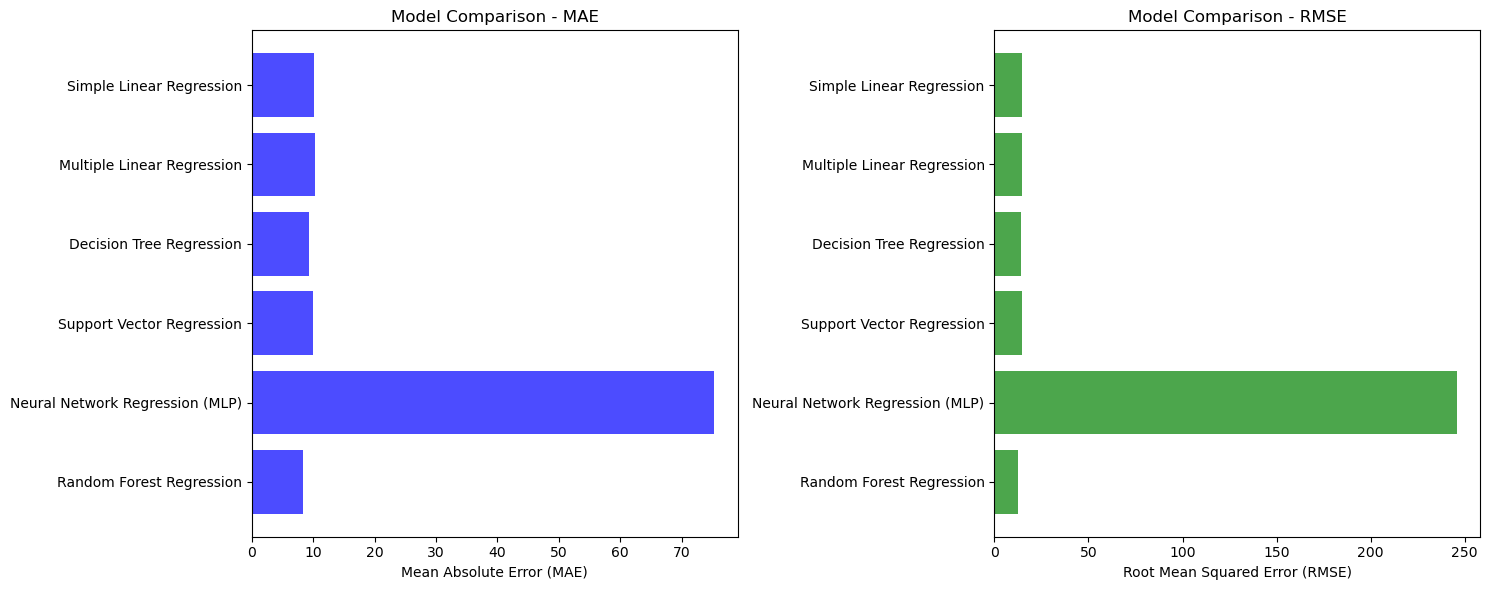

In [42]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Custom Scorer for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


# Replace infinite values with NaN and drop them
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Models
linear_model = LinearRegression()
multi_linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(max_depth=13, random_state=1)
svr_model = SVR()
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=100, random_state=1)
rf_model = RandomForestRegressor(n_estimators=100, random_state=1)

# Features for multiple linear regression
features_multi = [
    'Agriculture, hunting, forestry, fishing (ISIC A-B)',
    'Construction (ISIC F)',
    'Exports of goods and services',
    'Imports of goods and services',
    'Manufacturing (ISIC D)',
    'Transport, storage and communication (ISIC I)',
    'Wholesale, retail trade, restaurants and hotels (ISIC G-H)'
]

# Cross-Validation Scores
cv_scores = {
    "Simple Linear Regression": {
        "MAE": -cross_val_score(linear_model, X[['Gross National Income(GNI) in USD']], y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(linear_model, X[['Gross National Income(GNI) in USD']], y, cv=5, scoring=rmse_scorer).mean()
    },
    "Multiple Linear Regression": {
        "MAE": -cross_val_score(multi_linear_model, X[features_multi], y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(multi_linear_model, X[features_multi], y, cv=5, scoring=rmse_scorer).mean()
    },
    "Decision Tree Regression": {
        "MAE": -cross_val_score(tree_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(tree_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Support Vector Regression": {
        "MAE": -cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(svr_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Neural Network Regression (MLP)": {
        "MAE": -cross_val_score(mlp_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(mlp_model, X, y, cv=5, scoring=rmse_scorer).mean()
    },
    "Random Forest Regression": {
        "MAE": -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean(),
        "RMSE": -cross_val_score(rf_model, X, y, cv=5, scoring=rmse_scorer).mean()
    }
}

# Extract data for plotting
models = list(cv_scores.keys())
mae_scores = [metrics["MAE"] for metrics in cv_scores.values()]
rmse_scores = [metrics["RMSE"] for metrics in cv_scores.values()]

# Plot MAE and RMSE side by side
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# MAE Plot
axs[0].barh(models, mae_scores, color='blue', alpha=0.7)
axs[0].set_xlabel('Mean Absolute Error (MAE)')
axs[0].set_title('Model Comparison - MAE')
axs[0].invert_yaxis()

# RMSE Plot
axs[1].barh(models, rmse_scores, color='green', alpha=0.7)
axs[1].set_xlabel('Root Mean Squared Error (RMSE)')
axs[1].set_title('Model Comparison - RMSE')
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()


Gradient Boosting - MAE: 8.47, RMSE: 13.24
Cross-Validation - MAE: 8.82, RMSE: 13.66


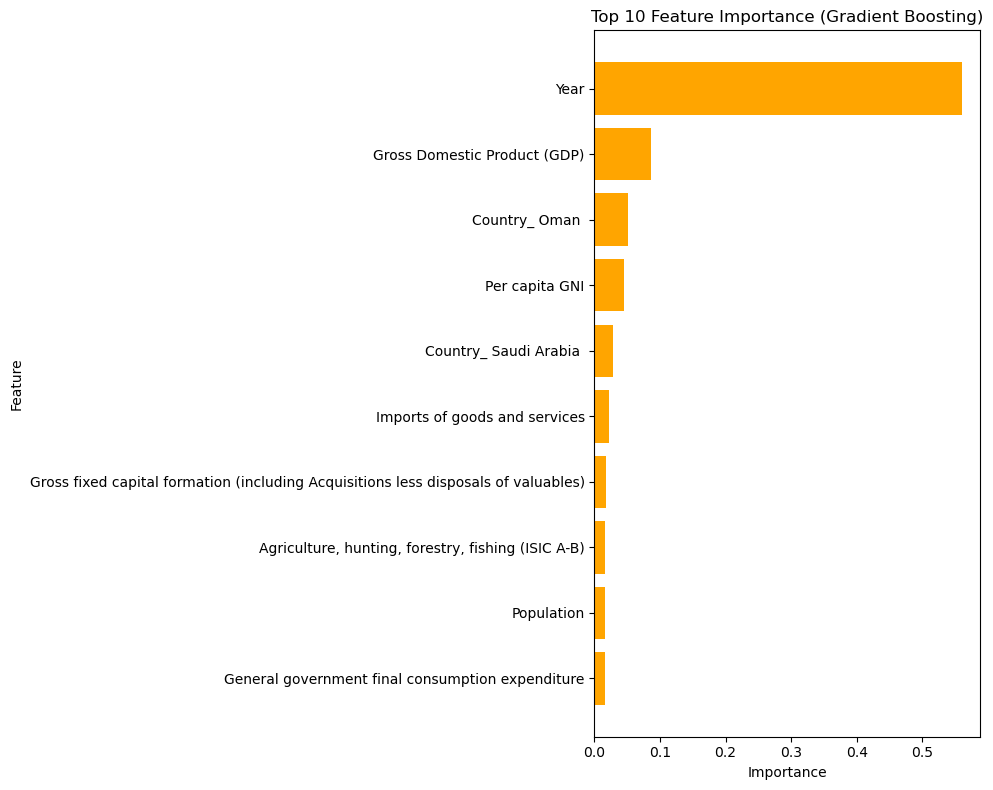

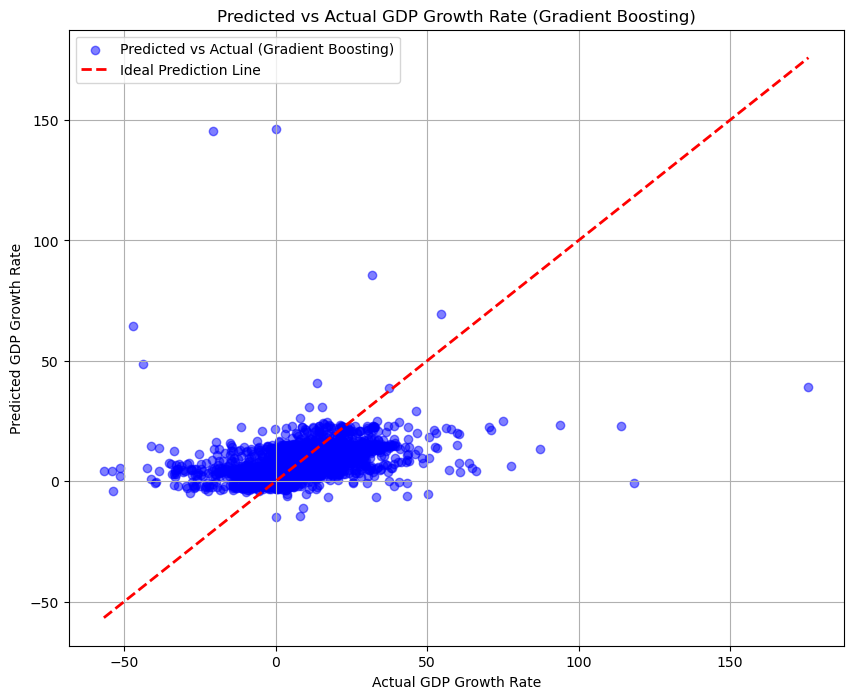

In [43]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Custom Scorer for RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


# Replace infinite values with NaN and drop them
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Gradient Boosting Regression Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
gb_model.fit(X_train, y_train)

# Predict on test data
y_test_pred = gb_model.predict(X_test)

# Evaluation Metrics
mae_gb = mean_absolute_error(y_test, y_test_pred)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Gradient Boosting - MAE: {mae_gb:.2f}, RMSE: {rmse_gb:.2f}")

# Cross-Validation Scores
cv_mae_gb = -cross_val_score(gb_model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
cv_rmse_gb = -cross_val_score(gb_model, X, y, cv=5, scoring=rmse_scorer).mean()
print(f"Cross-Validation - MAE: {cv_mae_gb:.2f}, RMSE: {cv_rmse_gb:.2f}")

# Feature Importance
feature_importances = gb_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot Top 20 Feature Importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Gradient Boosting)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Visualization: Predicted vs Actual GDP Growth Rate
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label='Predicted vs Actual (Gradient Boosting)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()


In [44]:
!pip install streamlit h2o pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\musha\AppData\Local\Temp\tmpjg2cqbtp
  JVM stdout: C:\Users\musha\AppData\Local\Temp\tmpjg2cqbtp\h2o_musha_started_from_python.out
  JVM stderr: C:\Users\musha\AppData\Local\Temp\tmpjg2cqbtp\h2o_musha_started_from_python.err
  Server is running at http://127.0.0.1:54327
Connecting to H2O server at http://127.0.0.1:54327 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_musha_wp1pmt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.907 Gb
H2O_cluster_total_cores:,32
H2O_cluster_allowed_cores:,32
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:35:35.400: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240516_173535     12.5515  157.541  8.08328      nan                   157.541
StackedEnsemble_BestOfFamily_1_AutoML_1_20240516_173535  12.5735  158.092  8.10917      nan                   158.092
GBM_grid_1_AutoML_1_20240516_173535_model_15             12.7168  161.717  8.26208      nan                   161.717
GBM_grid_1_AutoML_1_20240516_173535_model_4              12.7446  162.424  8.23536      nan                   162.424
GBM_4_AutoML_1_20240516_173535                           12.74

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


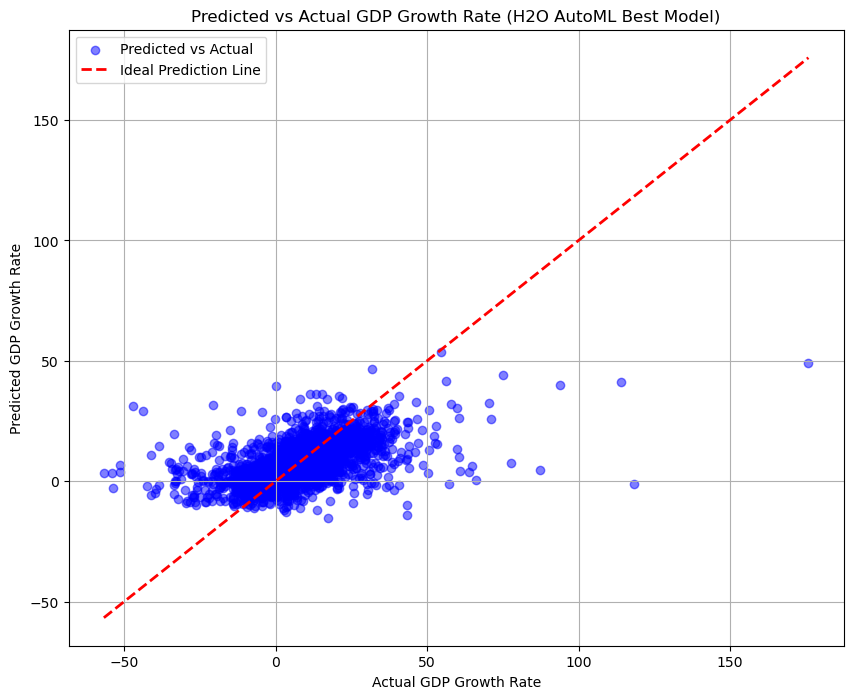

Best Model from H2O AutoML:
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240516_173535


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       13/33
# GBM base models (used / total)           11/25
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  0/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 79.93228629204428
RMSE: 8.940485797317967
MAE: 5.866892646773129
RMSLE: NaN
Mean Residual Deviance: 79.932

In [83]:
# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Initialize H2O
h2o.init()

# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


# Replace infinite values with NaN and drop them
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert training and testing sets to H2O frames
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Set target and feature names
target = 'GDP Growth Rate (%)'
features = list(X_train.columns)

# Initialize H2O AutoML model
aml = H2OAutoML(max_models=20, seed=1, nfolds=5)

# Train H2O AutoML model
aml.train(x=features, y=target, training_frame=train)

# View the leaderboard
leaderboard = aml.leaderboard
print(leaderboard)

# Predict on the test set
preds = aml.predict(test)

# Convert H2O frame to pandas dataframe for evaluation
preds_df = preds.as_data_frame()
y_test_df = y_test.reset_index(drop=True)
results = pd.concat([y_test_df, preds_df], axis=1)
results.columns = ['Actual', 'Predicted']

# Calculate evaluation metrics
mae = np.mean(np.abs(results['Actual'] - results['Predicted']))
rmse = np.sqrt(np.mean((results['Actual'] - results['Predicted']) ** 2))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualization: Plot of predicted vs actual GDP Growth Rate
plt.figure(figsize=(10, 8))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (H2O AutoML Best Model)')
plt.legend()
plt.grid(True)
plt.show()

# Print the best model
best_model = aml.leader
print("Best Model from H2O AutoML:")
print(best_model)

# Shutdown H2O cluster
h2o.cluster().shutdown(prompt=False)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 22.0.1+8-16, mixed mode, sharing)
  Starting server from C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\musha\AppData\Local\Temp\tmp3tzqwunz
  JVM stdout: C:\Users\musha\AppData\Local\Temp\tmp3tzqwunz\h2o_musha_started_from_python.out
  JVM stderr: C:\Users\musha\AppData\Local\Temp\tmp3tzqwunz\h2o_musha_started_from_python.err
  Server is running at http://127.0.0.1:54327
Connecting to H2O server at http://127.0.0.1:54327 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,2 months and 3 days
H2O_cluster_name:,H2O_from_python_musha_6p4vyb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.908 Gb
H2O_cluster_total_cores:,32
H2O_cluster_allowed_cores:,32
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
17:54:03.376: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20240516_175403     12.5517  157.545  8.08555      nan                   157.545
StackedEnsemble_BestOfFamily_1_AutoML_1_20240516_175403  12.5713  158.038  8.11526      nan                   158.038
GBM_grid_1_AutoML_1_20240516_175403_model_15             12.7168  161.717  8.26208      nan                   161.717
GBM_grid_1_AutoML_1_20240516_175403_model_4              12.7446  162.424  8.23536      nan                   162.424
GBM_4_AutoML_1_20240516_175403                           12.74

C:\Users\musha\AppData\Roaming\Python\Python311\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


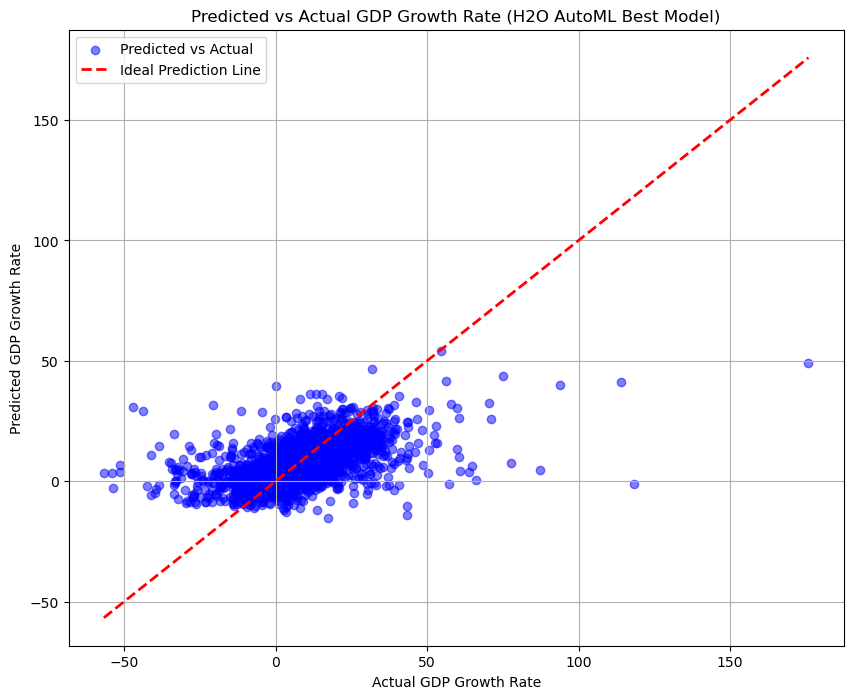

Best Model from H2O AutoML:
Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20240516_175403


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       14/33
# GBM base models (used / total)           11/25
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/5
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 79.99810121354126
RMSE: 8.944165763979402
MAE: 5.86832390717562
RMSLE: NaN
Mean Residual Deviance: 79.9981

In [84]:
# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Initialize H2O
h2o.init()

# Read data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data = pd.get_dummies(data, columns=['Country'], drop_first=True)


# Replace infinite values with NaN and drop them
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Define features and target variable
X = data.drop('GDP Growth Rate (%)', axis=1)
y = data['GDP Growth Rate (%)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert training and testing sets to H2O frames
train = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Set target and feature names
target = 'GDP Growth Rate (%)'
features = list(X_train.columns)

# Initialize H2O AutoML model
aml = H2OAutoML(max_models=20, seed=1, nfolds=5)

# Train H2O AutoML model
aml.train(x=features, y=target, training_frame=train)

# View the leaderboard
leaderboard = aml.leaderboard
print(leaderboard)

# Predict on the test set
preds = aml.predict(test)

# Convert H2O frame to pandas dataframe for evaluation
preds_df = preds.as_data_frame()
y_test_df = y_test.reset_index(drop=True)
results = pd.concat([y_test_df, preds_df], axis=1)
results.columns = ['Actual', 'Predicted']

# Calculate evaluation metrics
mae = np.mean(np.abs(results['Actual'] - results['Predicted']))
rmse = np.sqrt(np.mean((results['Actual'] - results['Predicted']) ** 2))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Visualization: Plot of predicted vs actual GDP Growth Rate
plt.figure(figsize=(10, 8))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()],
         color='red', linestyle='--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual GDP Growth Rate')
plt.ylabel('Predicted GDP Growth Rate')
plt.title('Predicted vs Actual GDP Growth Rate (H2O AutoML Best Model)')
plt.legend()
plt.grid(True)
plt.show()

# Print the best model
best_model = aml.leader
print("Best Model from H2O AutoML:")
print(best_model)

# Shutdown H2O cluster
h2o.cluster().shutdown(prompt=False)


Time Series

In [47]:
import tkinter as tk
from tkinter import simpledialog, messagebox
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load and prepare the data
data = pd.read_csv("Cleaned Global Eco Inc.csv")
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)
data['Country'] = data['Country'].str.strip().str.title()

In [48]:
# Check for infinite values
print("Infinite values in data:", data.isin([np.inf, -np.inf]).sum())

Infinite values in data: CountryID                                                                                   0
Country                                                                                     0
Population                                                                                  0
Per capita GNI                                                                              0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          0
Construction (ISIC F)                                                                       0
Exports of goods and services                                                               0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less disposals of valuables)          0
Household consumption expenditure (

In [49]:
# Replace inf/-inf with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Optional: Drop rows with NaN values or fill NaNs
data.dropna(inplace=True)
data['GDP Growth Rate (%)'] = data['GDP Growth Rate (%)'].astype(float)

In [60]:
# GUI setup
root = tk.Tk()
root.title("GDP Growth Rate Prediction")

def predict_gdp():
    country = simpledialog.askstring("Input", "Enter the country:")
    years = simpledialog.askinteger("Input", "Enter the number of years into the future:")
    
    if country and years:
        country_data = data[data['Country'] == country]
        if not country_data.empty:
            # Fit the best ARIMA model using auto_arima
            model_fit = auto_arima(country_data['GDP Growth Rate (%)'], seasonal=True, m=1,
                                   trace=True, error_action='ignore', suppress_warnings=True,
                                   stepwise=True)
            
            last_year = country_data.index[-1]
            forecast_years = [last_year + DateOffset(years=i) for i in range(1, years+1)]
            forecast = model_fit.predict(n_periods=years)
            
            predicted_rate = forecast[-1] * 100
            result_text = f"Predicted GDP Growth Rate for {country} in {forecast_years[-1].year}: {predicted_rate:.2f}%"
            messagebox.showinfo("Prediction Result", result_text)
            
            # Calculate and display model evaluation metrics
            y_true = country_data['GDP Growth Rate (%)'][-10:]  # last 10 data points as true values
            y_pred = model_fit.predict(n_periods=10)   # forecast the next 10 data points
            
            mae = mean_absolute_error(y_true, y_pred)
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            
            print(f"Mean Absolute Error: {mae}")
            print(f"Root Mean Squared Error: {rmse}")
        else:
            messagebox.showerror("Error", "No data available for the selected country.")

predict_button = tk.Button(root, text="Predict GDP Growth Rate", command=predict_gdp)
predict_button.pack(pady=20)

root.mainloop()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=364.528, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=364.980, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=365.015, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=401.200, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=366.980, Time=0.02 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.111 seconds
Mean Absolute Error: 5.997807530615384
Root Mean Squared Error: 7.282210481777125


In [61]:
if len(data['GDP Growth Rate (%)']) > 10:
    train = data['GDP Growth Rate (%)'][:-10]
    test = data['GDP Growth Rate (%)'][-10:]
    model_fit = auto_arima(train, seasonal=True, m=1, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)
    prediction = model_fit.predict(n_periods=10)
    mae = mean_absolute_error(test, prediction)
    rmse = np.sqrt(mean_squared_error(test, prediction))
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=85411.307, Time=4.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=86197.444, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=85432.641, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=85488.719, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=88833.679, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=85421.513, Time=2.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=85426.853, Time=2.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=85414.671, Time=1.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=85411.043, Time=8.68 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=85409.044, Time=5.41 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=85407.153, Time=1.94 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=85456.157, Time=1.55 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=85409.043, Time=2.68 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=85410.996, Time=1.71 sec
 ARIMA(0,0,3)(0,0,0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [63]:
file_path = 'Cleaned Global Eco Inc.csv'
data = pd.read_csv(file_path)

In [64]:
data['Country'] = data['Country'].str.strip().str.title()


In [65]:
print(data.isnull().sum())

CountryID                                                                                   0
Country                                                                                     0
Year                                                                                        0
Population                                                                                  0
Per capita GNI                                                                              0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                          0
Construction (ISIC F)                                                                       0
Exports of goods and services                                                               0
General government final consumption expenditure                                            0
Gross capital formation                                                                     0
Gross fixed capital formation (including Acquisitions less d

In [66]:
country_data = data[data['Country'] == 'United States']
country_data

,CountryID,Country,Year,Population,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Construction (ISIC F),Exports of goods and services,General government final consumption expenditure,Gross capital formation,Gross fixed capital formation (including Acquisitions less disposals of valuables),Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP),GDP Growth Rate (%)
10093,840,United States,1970,140.490575,22.745995,1858.170408,4167.102918,1737.952965,5761.194030,3584.138182,3095.558546,4069.182390,1640.000000,5133.475067,4549.346346,4176.956161,4971.590909,4533.883885,4592.264092,0.000000
10094,840,United States,1971,142.299676,24.316745,1998.755669,4562.817387,1830.090685,6238.805970,3911.193345,3432.032301,4402.515723,1833.588235,5400.415505,4935.612480,4578.561542,5369.318182,4915.239875,4978.530230,8.411235
10095,840,United States,1972,143.934076,26.485063,2316.600608,5087.744745,2053.214604,6716.417910,4355.988365,3768.506057,4830.188679,2182.823529,5954.830261,5450.633993,5140.809075,5937.500000,5423.714528,5493.551746,10.344851
10096,840,United States,1973,145.390272,29.336315,3404.608281,5677.278546,2744.842125,7134.328358,4931.605451,4266.487214,5345.911950,2681.147059,6652.982176,6094.410883,5662.896070,6590.909091,6059.307844,6137.328642,11.718774
10097,840,United States,1974,146.767100,31.534512,3300.697436,6000.310766,3643.312315,7910.447761,5167.085167,4535.666218,5849.056604,3735.294118,6940.456494,6566.513937,6265.304141,7159.090909,6567.782497,6652.350158,8.391624
10098,840,United States,1975,148.167326,33.886368,3398.495878,6129.523654,3983.094934,8865.671642,5049.345309,4683.714670,6477.987421,3617.647059,7289.532451,7124.453908,6506.267370,7840.909091,7118.630038,7210.290134,8.387111
10099,840,United States,1976,149.566795,37.271164,3325.147047,6920.952593,4294.562335,9402.985075,5978.181970,5329.744280,7232.704403,4441.176471,8336.760324,7939.904637,7429.959745,8693.181818,7923.714905,8025.740868,11.309541
10100,840,United States,1977,151.086817,41.116940,3361.821463,7639.699283,4549.399299,10179.104480,6985.511869,6285.329744,7987.421384,5352.941176,9507.191476,8884.110743,8233.170507,9573.863636,8813.545548,8927.028522,11.229962
10101,840,United States,1978,152.800857,45.888946,3924.162507,9032.246493,5342.225410,11074.626870,8215.239279,7510.094213,8930.817610,6235.294118,10636.554870,10042.909150,9357.665573,10880.681820,9957.613518,10085.826930,12.980785
10102,840,United States,1979,154.611432,50.468877,4633.201216,10161.278900,6559.779795,12089.552240,9209.486972,8640.646030,10000.000000,7441.176471,11745.384380,11201.707550,10321.518490,12073.863640,11059.308600,11287.543810,11.914907


In [67]:
country_data = country_data[['Year', 'GDP Growth Rate (%)']]

In [68]:
country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')
country_data.set_index('Year', inplace=True)

C:\Users\musha\AppData\Local\Temp\ipykernel_18088\4133695636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['Year'] = pd.to_datetime(country_data['Year'], format='%Y')


In [69]:
print(country_data)

            GDP Growth Rate (%)
Year                           
1970-01-01             0.000000
1971-01-01             8.411235
1972-01-01            10.344851
1973-01-01            11.718774
1974-01-01             8.391624
1975-01-01             8.387111
1976-01-01            11.309541
1977-01-01            11.229962
1978-01-01            12.980785
1979-01-01            11.914907
1980-01-01             8.745256
1981-01-01            12.237773
1982-01-01             4.049847
1983-01-01             8.682641
1984-01-01            11.294774
1985-01-01             7.425747
1986-01-01             5.529957
1987-01-01             6.113541
1988-01-01             7.818934
1989-01-01             7.633592
1990-01-01             5.673761
1991-01-01             3.355706
1992-01-01             5.844158
1993-01-01             5.214726
1994-01-01             6.268224
1995-01-01             4.801099
1996-01-01             5.628274
1997-01-01             6.319705
1998-01-01             5.594407
1999-01-

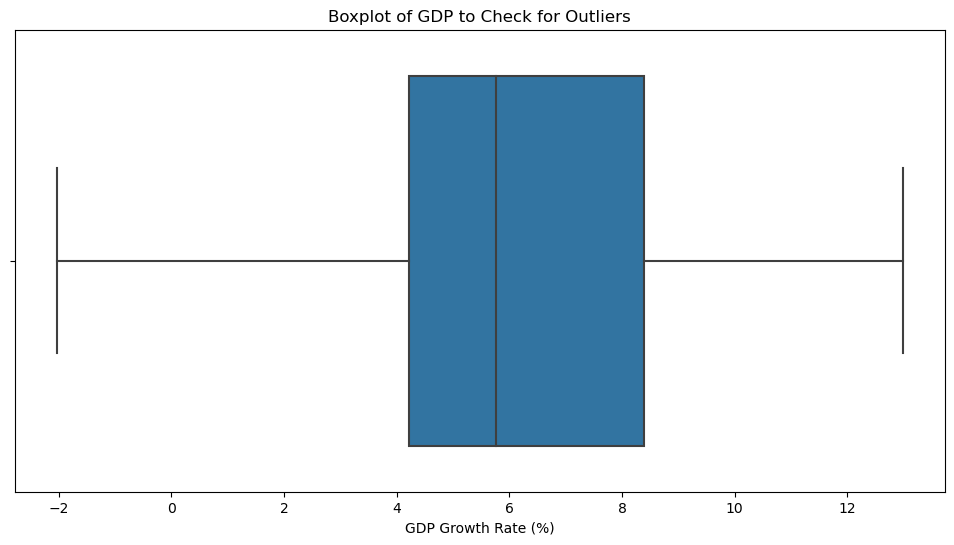

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=country_data['GDP Growth Rate (%)'])
plt.title('Boxplot of GDP to Check for Outliers')
plt.show()

In [71]:
q_low = country_data['GDP Growth Rate (%)'].quantile(0.01)
q_high = country_data['GDP Growth Rate (%)'].quantile(0.99)
country_data = country_data[(country_data['GDP Growth Rate (%)'] > q_low) & (country_data['GDP Growth Rate (%)'] < q_high)]

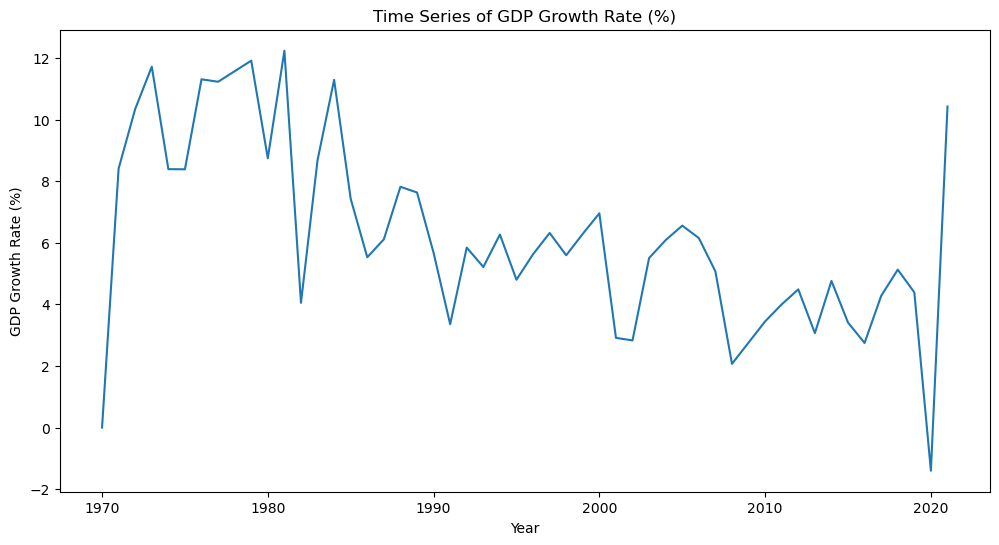

In [72]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=country_data.index, y=country_data['GDP Growth Rate (%)'])
plt.title('Time Series of GDP Growth Rate (%)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

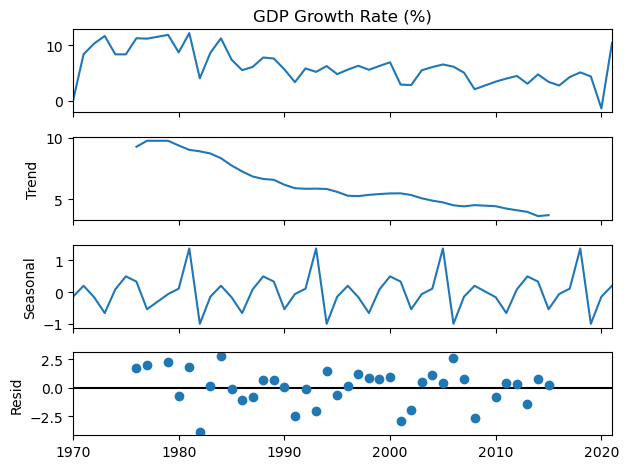

In [73]:
if len(country_data) >= 24:  # Ensure at least 2 years of monthly data
    decomposition = seasonal_decompose(country_data['GDP Growth Rate (%)'], model='additive', period=12)
    decomposition.plot()
    plt.show()
else:
    print("Not enough data points for seasonal decomposition.")


In [74]:
train = country_data[:'2020']
test = country_data['2021':]

In [75]:
model = ARIMA(train['GDP Growth Rate (%)'], order=(5, 1, 2))
arima_result = model.fit()
print(arima_result.summary())

                                SARIMAX Results                                
Dep. Variable:     GDP Growth Rate (%)   No. Observations:                   49
Model:                  ARIMA(5, 1, 2)   Log Likelihood                -105.857
Date:                 Thu, 16 May 2024   AIC                            227.714
Time:                         17:28:47   BIC                            242.683
Sample:                              0   HQIC                           233.371
                                  - 49                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4571      1.055     -0.433      0.665      -2.525       1.611
ar.L2          0.3779      1.498      0.252      0.801      -2.558       3.314
ar.L3          0.0412      1.081      0.038 

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [76]:
arima_forecast = arima_result.forecast(steps=len(test))
test.loc[:, 'ARIMA_Forecast'] = arima_forecast

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\musha\AppData\Local\Temp\ipykernel_18088\2226860853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'ARIMA_Forecast'] = arima_forecast


In [77]:
prophet_data = country_data.reset_index().rename(columns={'Year': 'ds', 'GDP Growth Rate (%)': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

17:28:49 - cmdstanpy - INFO - Chain [1] start processing
17:28:49 - cmdstanpy - INFO - Chain [1] done processing


In [78]:
prophet_data = country_data.reset_index().rename(columns={'Year': 'ds', 'GDP Growth Rate (%)': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_data)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)

17:28:50 - cmdstanpy - INFO - Chain [1] start processing
17:28:51 - cmdstanpy - INFO - Chain [1] done processing


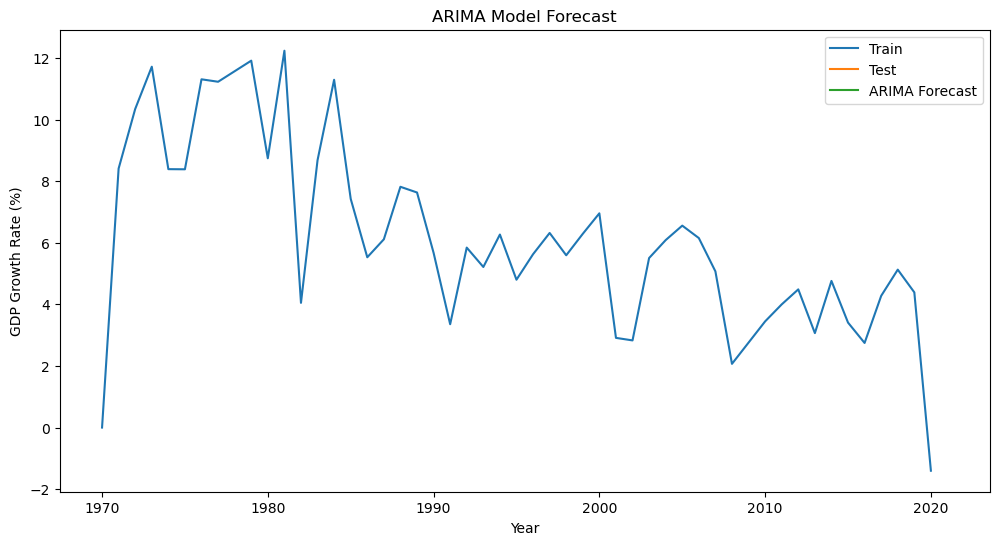

In [79]:
plt.figure(figsize=(12, 6))
plt.plot(train['GDP Growth Rate (%)'], label='Train')
plt.plot(test['GDP Growth Rate (%)'], label='Test')
plt.plot(test['ARIMA_Forecast'], label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.show()

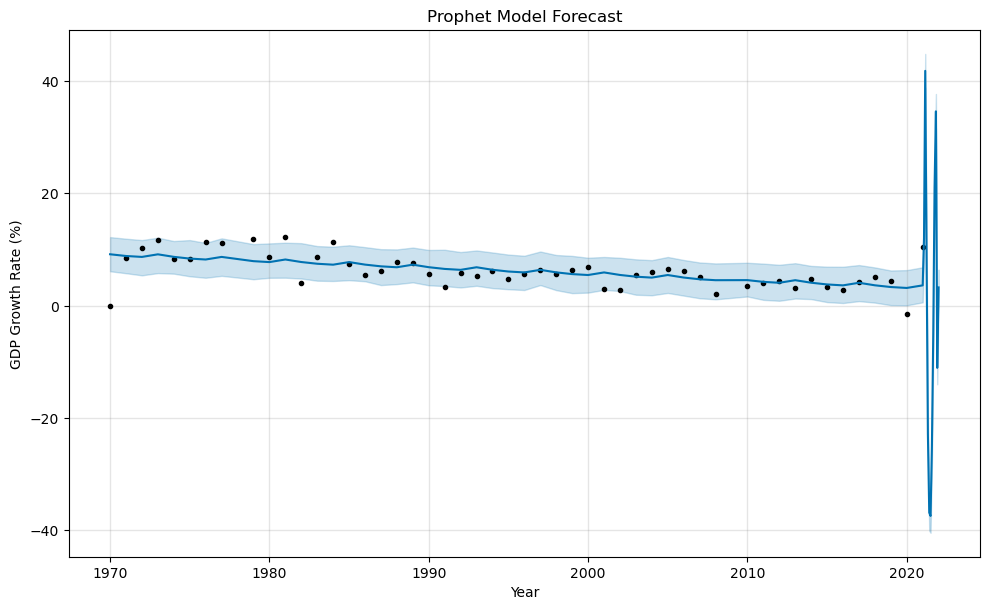

In [80]:
prophet_model.plot(forecast)
plt.title('Prophet Model Forecast')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.show()

In [81]:
forecasted_values = forecast[['ds', 'yhat']].set_index('ds')
forecasted_values.rename(columns={'yhat': 'Prophet_Forecast'}, inplace=True)

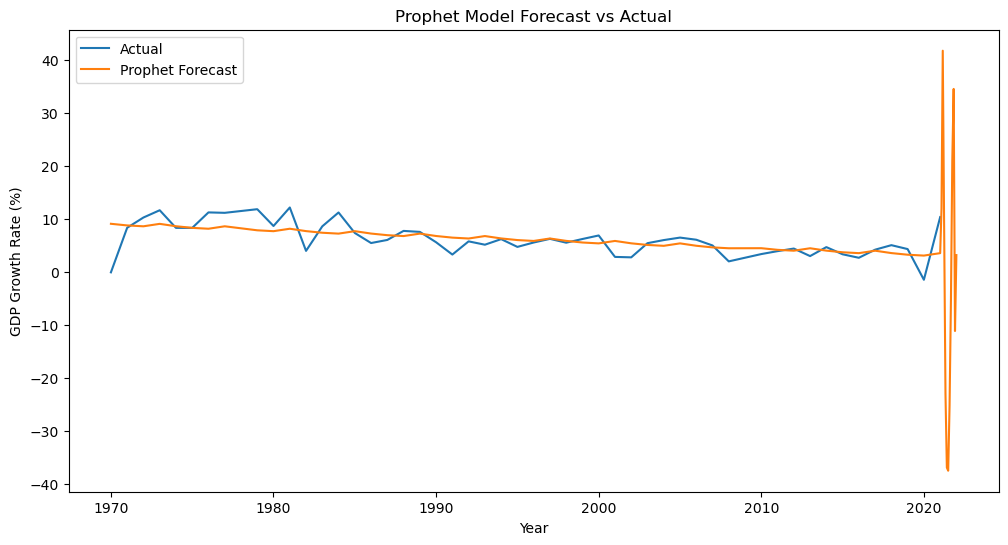

In [82]:
plt.figure(figsize=(12, 6))
plt.plot(country_data['GDP Growth Rate (%)'], label='Actual')
plt.plot(forecasted_values['Prophet_Forecast'], label='Prophet Forecast')
plt.title('Prophet Model Forecast vs Actual')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.legend()
plt.show()